<a href="https://colab.research.google.com/github/benedi91/data_science/blob/master/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we have an example of decision tree. As dataset, I used popular Iris dataset, but you can easily use another dataset by changing url and X variables.

In [0]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import collections

In [0]:
# import dataset
url = f"https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv"
iris_set = pd.read_csv(url, encoding='ISO-8859-1', error_bad_lines=False)
# if an error occures, try to change encoding

In [0]:
X = iris_set.loc[:, iris_set.columns != 'species'] # Features
y = iris_set.species # Target variable
feature_cols = list(X.columns) #list of feature columns

In [0]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # 75% training and 25% test

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [95]:
#Statiscics
# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(('Accuracy: %f' % accuracy))
# Model Precision
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print(('Precision: %f' % precision))
# Model F1
f1 = metrics.f1_score(y_test, y_pred,average='weighted')
print(('F1: %f' % f1))
# Model Recall
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print(('Recall: %f' % recall))

Accuracy: 0.973684
Precision: 0.976316
F1: 0.973952
Recall: 0.973684


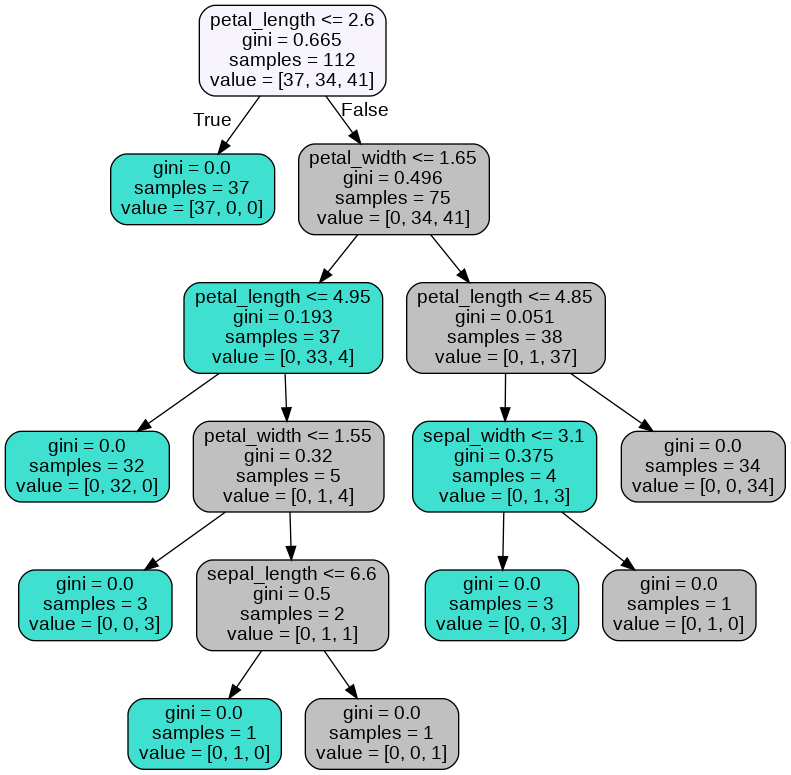

In [96]:
#plot decision tree
dot_data = export_graphviz(clf,
                                feature_names=feature_cols,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

#set different colors for options true/false
colors = ('turquoise','grey')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

#print tree
graph.write_png('tree.png')
Image(graph.create_png())